In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv("/content/diabetes.csv")

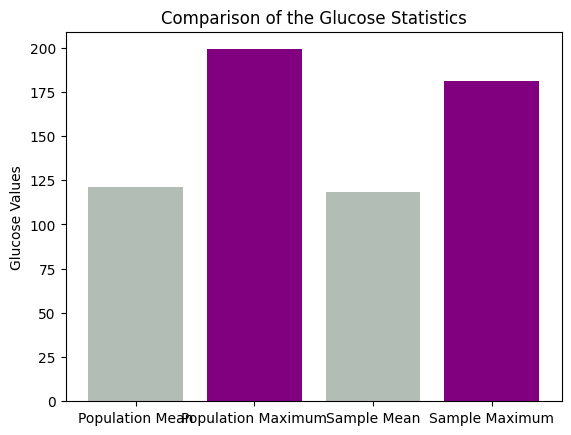

In [25]:

np.random.seed(612)


sample = data.sample(25)

population_mean_glucose = data['Glucose'].mean()
population_maximum_glucose = data['Glucose'].max()

sample_mean_glucose = sample['Glucose'].mean()
sample_maximum_glucose = sample['Glucose'].max()


# Creating tbe bar chart for comparing
labels = ['Population Mean', 'Population Maximum', 'Sample Mean', 'Sample Maximum']
values = [population_mean_glucose, population_maximum_glucose, sample_mean_glucose, sample_maximum_glucose]

plt.bar(labels, values, color=['#b2beb5', 'purple', '#b2beb5', 'purple'])
plt.title('Comparison of the Glucose Statistics')
plt.ylabel('Glucose Values')
plt.show()


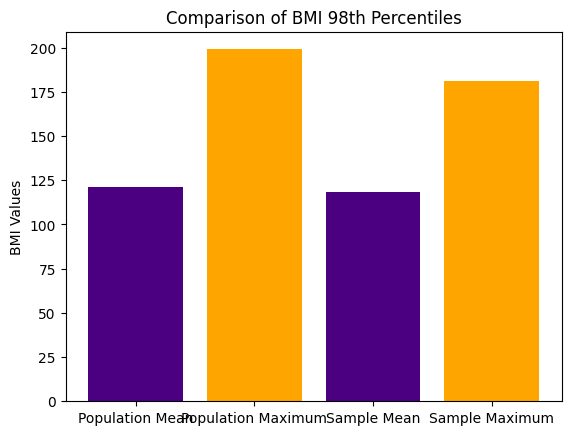

In [26]:
population_percentile = np.percentile(data['BMI'], 98)
sample_percentile = np.percentile(sample['BMI'], 98)

lbl = ['Population 98th Percentile', 'Sample 98th Percentile']
val = [population_percentile, sample_percentile]

plt.bar(labels, values, color=['indigo', 'orange'])
plt.title('Comparison of BMI 98th Percentiles')
plt.ylabel('BMI Values')
plt.show()

In [27]:

btstp_samples = 500
sample_size = 150


btstp_means = np.zeros(btstp_samples)
btstp_std_devs = np.zeros(btstp_samples)
btstp_percentiles = np.zeros(btstp_samples)


for i in range(btstp_samples):
    btstp_sample = data['BloodPressure'].sample(sample_size, replace=True)
    btstp_means[i] = btstp_sample.mean()
    btstp_std_devs[i] = btstp_sample.std()
    btstp_percentiles[i] = np.percentile(btstp_sample, 98)


population_mean = data['BloodPressure'].mean()
population_std_dev = data['BloodPressure'].std()
population_percentile = np.percentile(data['BloodPressure'], 98)


bmean=np.mean(btstp_means)
bsd=np.mean(btstp_std_devs)
bp=np.mean(btstp_percentiles)


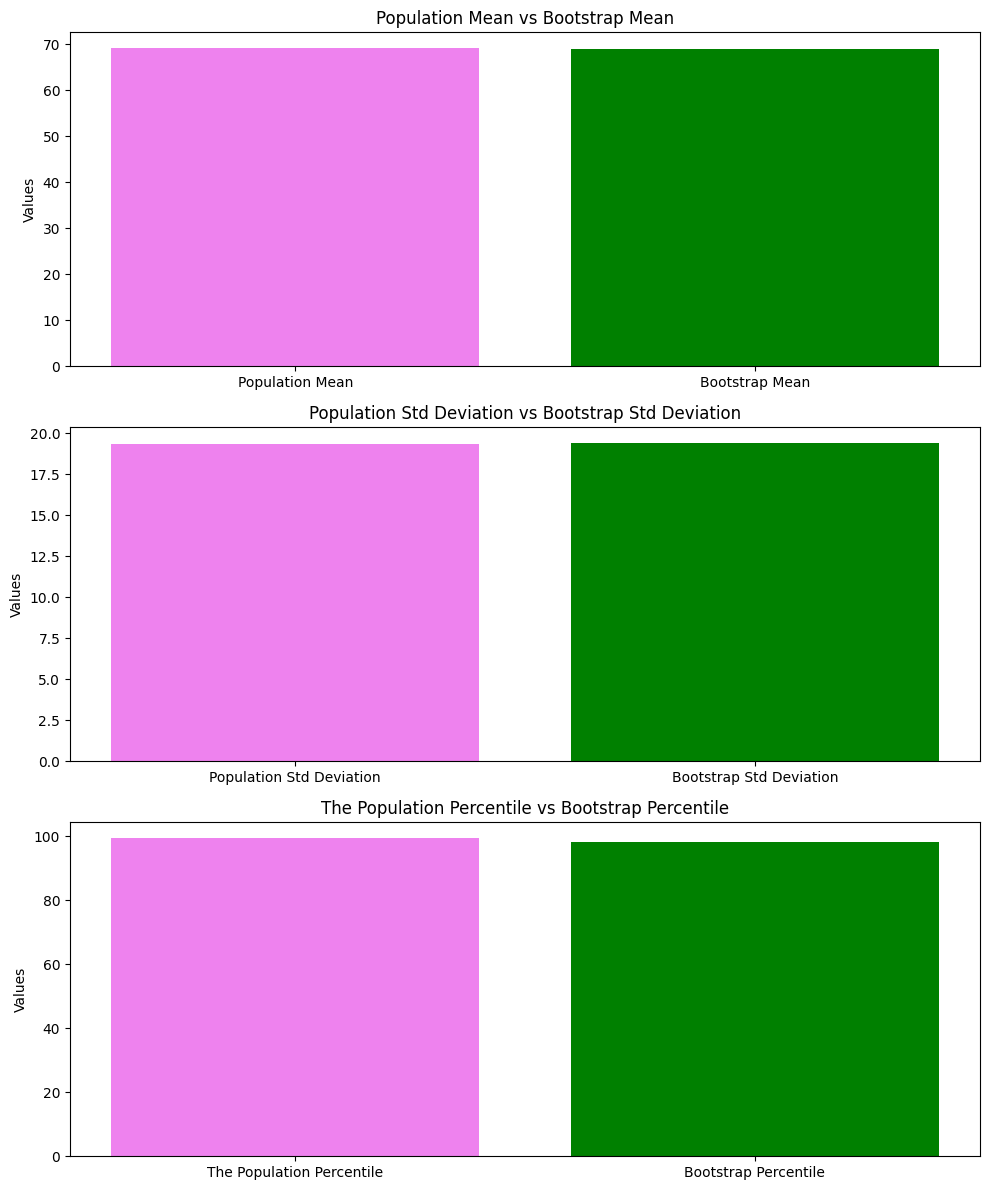

In [28]:
fig, axs = plt.subplots(3, 1, figsize=(10, 12))


axs[0].bar(['Population Mean', 'Bootstrap Mean'], [population_mean, bmean], color=['violet', 'green'])
axs[0].set_ylabel('Values')
axs[0].set_title('Population Mean vs Bootstrap Mean')


axs[1].bar(['Population Std Deviation', 'Bootstrap Std Deviation'], [population_std_dev, bsd], color=['violet', 'green'])
axs[1].set_ylabel('Values')
axs[1].set_title('Population Std Deviation vs Bootstrap Std Deviation')


axs[2].bar(['The Population Percentile', 'Bootstrap Percentile'], [population_percentile, bp], color=['violet', 'green'])
axs[2].set_ylabel('Values')
axs[2].set_title('The Population Percentile vs Bootstrap Percentile')

plt.tight_layout()
plt.show()